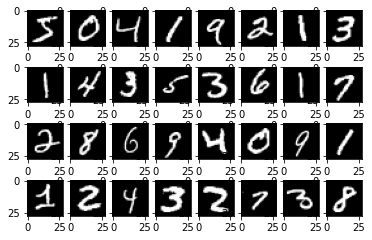

Epoch 1/20
3000/3000 [==============================] - 7s 2ms/step - loss: 0.1928 - accuracy: 0.9430
Epoch 2/20
3000/3000 [==============================] - 6s 2ms/step - loss: 0.0793 - accuracy: 0.9756
Epoch 3/20
3000/3000 [==============================] - 6s 2ms/step - loss: 0.0511 - accuracy: 0.9840
Epoch 4/20
3000/3000 [==============================] - 7s 2ms/step - loss: 0.0376 - accuracy: 0.9875
Epoch 5/20
3000/3000 [==============================] - 6s 2ms/step - loss: 0.0265 - accuracy: 0.9913
Epoch 6/20
3000/3000 [==============================] - 5s 2ms/step - loss: 0.0217 - accuracy: 0.9929
Epoch 7/20
3000/3000 [==============================] - 6s 2ms/step - loss: 0.0178 - accuracy: 0.9941
Epoch 8/20
1312/3000 [============>.................] - ETA: 3s - loss: 0.0116 - accuracy: 0.9959

In [ ]:
import matplotlib.pyplot as plot
from keras.datasets import mnist
import keras

(x_train, y_train), (x_test, y_test) = mnist.load_data()

for i in range(0, 32):
    plot.subplot(4, 8, i+1)
    plot.imshow(x_train[i], cmap='gray')
    
plot.show()

x_train = x_train.reshape(-1, 784).astype('float32') / 255
x_test = x_test.reshape(-1, 784).astype('float32') / 255
y_train = keras.utils.to_categorical(y_train.astype('int32'), 10)
y_test = keras.utils.to_categorical(y_test.astype('int32'), 10)

model = keras.models.Sequential()
Dense = keras.layers.Dense
model.add(Dense(512, activation='relu', input_shape=(784,)))
model.add(Dense(10, activation='softmax'))

model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

model.fit(x_train,y_train, epochs=20, batch_size=20)
score=model.evaluate(x_test, y_test, verbose=1)
print('正解率は', score[1], 'loss=', score[0])